In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RepeatedKFold,cross_validate,cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import tensorflow as tf
import pickle

## The data set includes information about:

-Customers who left within the last month – the column is called Churn

-Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

-Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

-Demographic info about customers – gender, age range, and if they have partners and dependents

In [3]:
df=pd.read_csv('Telco-Customer-Churn.csv')
display(df.info(),
       df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6626 non-null   object 
 1   gender            6626 non-null   object 
 2   SeniorCitizen     6626 non-null   int64  
 3   Partner           6626 non-null   object 
 4   Dependents        6626 non-null   object 
 5   tenure            6626 non-null   int64  
 6   PhoneService      6626 non-null   object 
 7   MultipleLines     6626 non-null   object 
 8   InternetService   6626 non-null   object 
 9   OnlineSecurity    6626 non-null   object 
 10  OnlineBackup      6626 non-null   object 
 11  DeviceProtection  6626 non-null   object 
 12  TechSupport       6626 non-null   object 
 13  StreamingTV       6626 non-null   object 
 14  StreamingMovies   6626 non-null   object 
 15  Contract          6626 non-null   object 
 16  PaperlessBilling  6626 non-null   object 


None

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218], dtype='int64')

In [6]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6617.000000,6617.000000,6617.000000
mean,0.162158,32.373432,64.734124
std,0.368624,24.574715,30.121317
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:>

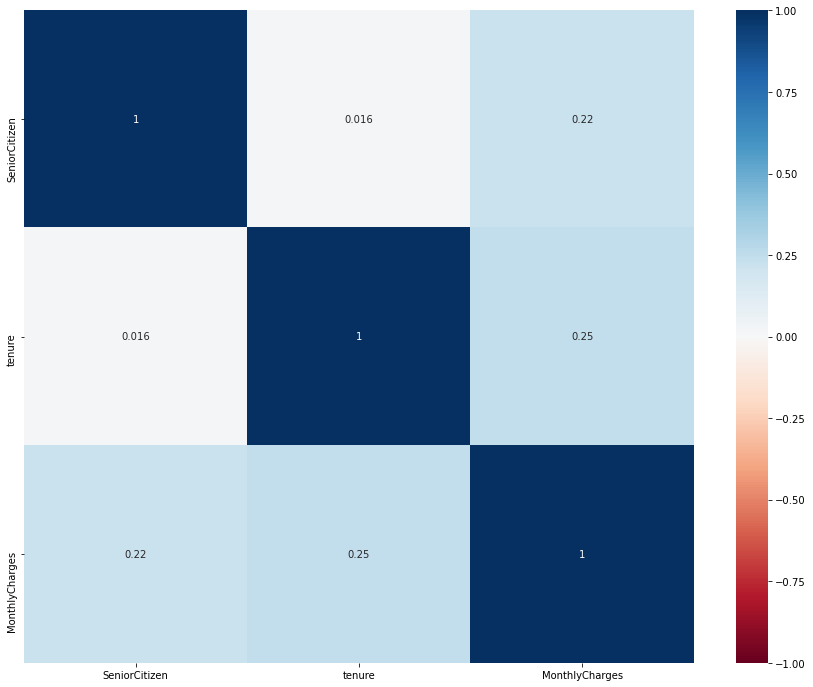

In [8]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(),
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)

In [9]:
def object_to_int(dataframe):
    if dataframe.dtype=='object':
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

In [10]:
df = df.apply(lambda x: object_to_int(x))
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5054,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2358,0
1,3713,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1384,0
2,2393,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,145,1
3,5202,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1321,0
4,6120,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,871,1
5,6157,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,5749,1
6,934,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1463,0
7,4477,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,2457,0
8,5267,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,2492,1
9,4258,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,2846,0


In [11]:
df_int_float=df[["tenure", 'MonthlyCharges', 'TotalCharges']]
df_int_float.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,2358
1,34,56.95,1384
2,2,53.85,145
3,45,42.30,1321
4,2,70.70,871


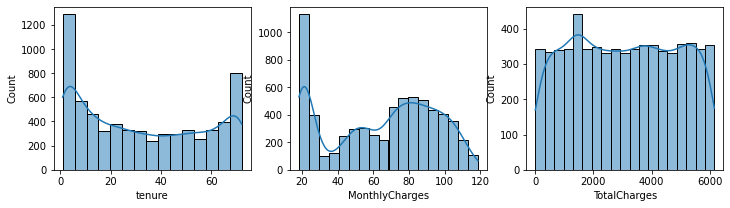

In [12]:
fig,axs=plt.subplots(1,3,figsize=(12,3))
for col_name,ax in zip(df_int_float.columns,axs.ravel()):
    sns.histplot(df_int_float,x=col_name,kde=True,ax=ax)

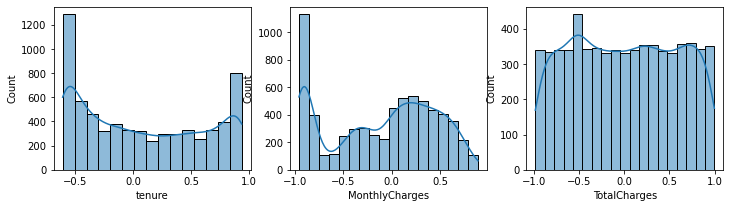

In [13]:
scaler=RobustScaler()
df[["tenure", 'MonthlyCharges', 'TotalCharges']]=scaler.fit_transform(df[["tenure", 'MonthlyCharges', 'TotalCharges']])
fig,axs=plt.subplots(1,3,figsize=(12,3))
for col_name,ax in zip(df[["tenure", 'MonthlyCharges', 'TotalCharges']].columns,axs.ravel()):
    sns.histplot(df[["tenure", 'MonthlyCharges', 'TotalCharges']],x=col_name,kde=True,ax=ax)

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5054,0,0,1,0,-0.608696,0,1,0,0,...,0,0,0,0,0,1,2,-0.743802,-0.227346,0
1,3713,1,0,0,0,0.108696,1,0,0,2,...,2,0,0,0,1,0,3,-0.246097,-0.541438,0
2,2393,1,0,0,0,-0.586957,1,0,0,2,...,0,0,0,0,0,1,3,-0.303030,-0.940987,1
3,5202,1,0,0,0,0.347826,0,1,0,2,...,2,2,0,0,1,0,0,-0.515152,-0.561754,0
4,6120,0,0,0,0,-0.586957,1,0,1,0,...,0,0,0,0,0,1,2,0.006428,-0.706869,1


In [15]:
X,y = df.drop(columns = ['Churn','customerID']),df['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify=y)
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape
)

(5293, 19)

(1324, 19)

(5293,)

(1324,)

# Machine Learning Model Evaluations

### 1.DecisionTreeClassifier

In [17]:
cv=RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=420)
tree=DecisionTreeClassifier()
scoring=['accuracy','precision','recall','f1','roc_auc']
tree_scores=cross_validate(tree,X,y,cv=cv,n_jobs=2,scoring=scoring)

In [18]:
tree_scores=pd.DataFrame(tree_scores)
tree_scores
tree_index=pd.DataFrame({'Model':['tree']*50})
tree_model=tree_index.join(tree_scores)
tree_model

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,tree,0.035325,0.011550,0.719033,0.495822,0.482385,0.489011,0.646729
1,tree,0.036934,0.010938,0.740937,0.553977,0.511811,0.532060,0.673237
2,tree,0.050866,0.012966,0.735450,0.483333,0.514793,0.498567,0.662980
3,tree,0.049814,0.011971,0.750567,0.490305,0.547988,0.517544,0.683307
4,tree,0.034922,0.011686,0.715042,0.456395,0.452450,0.454414,0.634524
5,tree,0.033907,0.012669,0.698640,0.465909,0.437333,0.451169,0.621457
6,tree,0.039891,0.011115,0.737915,0.504559,0.474286,0.488954,0.653101
7,tree,0.039893,0.010970,0.725624,0.456825,0.493976,0.474674,0.648347
8,tree,0.033963,0.013364,0.733938,0.477273,0.500000,0.488372,0.656788
9,tree,0.029974,0.014368,0.711262,0.478036,0.506849,0.492021,0.650159


### 2.RandomForestClassifier

In [19]:
forest=RandomForestClassifier(n_estimators=500, n_jobs = 2,max_depth=6,
                                  random_state =42, max_features = 5)
forest_scores=cross_validate(forest,X,y,cv=cv,n_jobs=2,scoring=scoring)

In [20]:
forest_scores=pd.DataFrame(forest_scores)
forest_scores
forest_index=pd.DataFrame({'Model':['forest']*50})
forest_model=forest_index.join(forest_scores)
forest_model

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,forest,1.341466,0.260304,0.794562,0.697959,0.463415,0.557003,0.847872
1,forest,1.334564,0.259192,0.775680,0.690909,0.398950,0.505824,0.852078
2,forest,1.321908,0.262323,0.798186,0.632959,0.500000,0.558678,0.832495
3,forest,1.320910,0.258334,0.822373,0.666667,0.544892,0.599659,0.855608
4,forest,1.507730,0.384970,0.805745,0.667910,0.515850,0.582114,0.840998
5,forest,1.449589,0.391954,0.788520,0.697095,0.448000,0.545455,0.839694
6,forest,1.765666,0.389937,0.807402,0.711111,0.457143,0.556522,0.853296
7,forest,1.796584,0.364005,0.802721,0.629091,0.521084,0.570016,0.833799
8,forest,1.607265,0.396941,0.813303,0.684647,0.491071,0.571924,0.853230
9,forest,1.641183,0.384067,0.787604,0.675000,0.443836,0.535537,0.847229


### 3.SVC

In [21]:
svc=SVC()
svc_scores=cross_validate(svc,X,y,cv=cv,n_jobs=2,scoring=scoring)

In [22]:
svc_scores=pd.DataFrame(svc_scores)
svc_scores
svc_index=pd.DataFrame({'Model':['svc']*50})
svc_model=svc_index.join(svc_scores)
svc_model

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,svc,1.089493,0.841758,0.775680,0.655172,0.411924,0.505824,0.816584
1,svc,1.084785,0.858707,0.779456,0.701357,0.406824,0.514950,0.808185
2,svc,1.070473,0.822596,0.784580,0.609053,0.437870,0.509466,0.792012
3,svc,1.100866,0.859651,0.815571,0.652510,0.523220,0.580756,0.813045
4,svc,1.042170,0.993070,0.804233,0.674603,0.489914,0.567613,0.812583
5,svc,1.022068,0.974419,0.778701,0.683036,0.408000,0.510851,0.806558
6,svc,1.055711,0.822138,0.798338,0.684444,0.440000,0.535652,0.817216
7,svc,1.047485,0.821277,0.789116,0.602317,0.469880,0.527919,0.808521
8,svc,0.990636,0.823311,0.797430,0.633858,0.479167,0.545763,0.790509
9,svc,0.984277,0.811357,0.794407,0.689796,0.463014,0.554098,0.816654


### 4.Logistic Regression

In [23]:
lr = LogisticRegression()
logistic_scores=cross_validate(lr,X,y,cv=cv,n_jobs=2,scoring=scoring)

In [24]:
logistic=pd.DataFrame(logistic_scores)
logistic
logistic_index=pd.DataFrame({'Model':['logistic']*50})
logistic_model=logistic_index.join(logistic)
logistic_model

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,logistic,0.061204,0.015957,0.793807,0.670213,0.512195,0.580645,0.841442
1,logistic,0.059243,0.015016,0.792296,0.702290,0.482940,0.572317,0.852943
2,logistic,0.042167,0.012964,0.801965,0.631034,0.541420,0.582803,0.830627
3,logistic,0.039893,0.013229,0.817082,0.635452,0.588235,0.610932,0.848707
4,logistic,0.039925,0.014475,0.803477,0.645485,0.556196,0.597523,0.841448
5,logistic,0.046543,0.016772,0.792296,0.681159,0.501333,0.577573,0.839413
6,logistic,0.039926,0.013988,0.804381,0.667897,0.517143,0.582931,0.848237
7,logistic,0.045035,0.015957,0.797430,0.603226,0.563253,0.582555,0.831793
8,logistic,0.042166,0.014613,0.806500,0.642857,0.535714,0.584416,0.848739
9,logistic,0.043019,0.014959,0.804989,0.686411,0.539726,0.604294,0.846674


### 5.XGBOOST

In [25]:
xg = XGBClassifier(n_estimators=500, n_jobs = 2,max_depth=6,random_state =42, max_features = 5)
xgboost_scores=cross_validate(xg,X,y,cv=cv,n_jobs=2,scoring=scoring)

In [26]:
xgboost_scores=pd.DataFrame(xgboost_scores)
xgboost_scores
xgboost=pd.DataFrame({'Model':['xgboost']*50})
xgboost_model=xgboost.join(xgboost_scores)
xgboost_model

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,xgboost,3.167068,0.038978,0.756042,0.576667,0.468835,0.517190,0.807120
1,xgboost,3.218909,0.039500,0.768127,0.628472,0.475066,0.541106,0.817756
2,xgboost,3.249079,0.042003,0.777022,0.570033,0.517751,0.542636,0.796737
3,xgboost,3.203523,0.044096,0.788360,0.570957,0.535604,0.552716,0.822913
4,xgboost,2.830905,0.034027,0.766440,0.561688,0.498559,0.528244,0.799544
5,xgboost,2.847864,0.042110,0.768127,0.614094,0.488000,0.543834,0.796594
6,xgboost,2.892415,0.033982,0.765861,0.572993,0.448571,0.503205,0.809495
7,xgboost,2.893628,0.033855,0.775510,0.552553,0.554217,0.553383,0.798694
8,xgboost,3.171055,0.034079,0.767952,0.551971,0.458333,0.500813,0.801042
9,xgboost,3.174922,0.032854,0.761149,0.580858,0.482192,0.526946,0.810806


In [27]:
compared=pd.concat([tree_model,forest_model,svc_model,logistic_model,xgboost_model]).drop(columns=['fit_time','score_time'])
compared

,Model,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,tree,0.719033,0.495822,0.482385,0.489011,0.646729
1,tree,0.740937,0.553977,0.511811,0.532060,0.673237
2,tree,0.735450,0.483333,0.514793,0.498567,0.662980
3,tree,0.750567,0.490305,0.547988,0.517544,0.683307
4,tree,0.715042,0.456395,0.452450,0.454414,0.634524
...,...,...,...,...,...,...
45,xgboost,0.774924,0.605970,0.550136,0.576705,0.808478
46,xgboost,0.763595,0.582143,0.454039,0.510172,0.802605
47,xgboost,0.767952,0.571930,0.468391,0.515008,0.799073
48,xgboost,0.768707,0.560554,0.475073,0.514286,0.807180


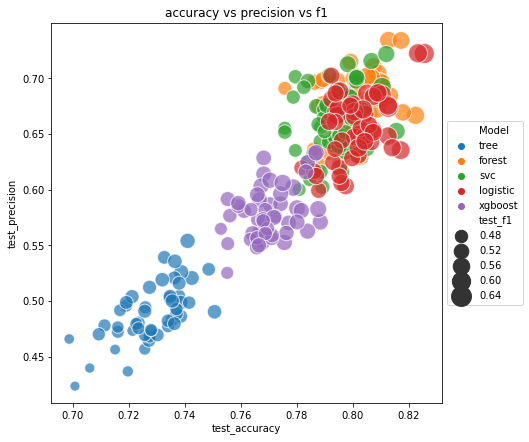

In [28]:
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=compared,x='test_accuracy',y='test_precision',hue='Model',size='test_f1',sizes=(100,400),alpha=0.7)
ax.set_title('accuracy vs precision vs f1')
ax.legend(bbox_to_anchor=(1,0.5),loc='center left')

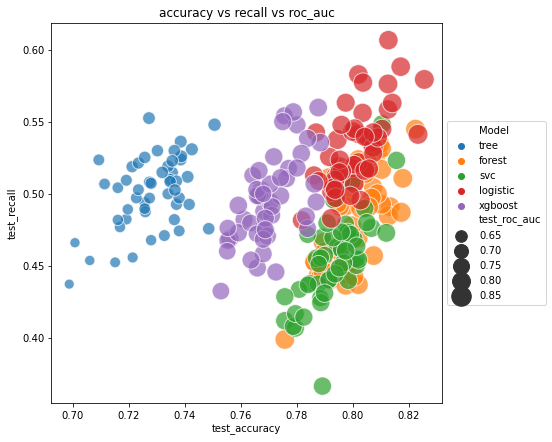

In [29]:
plt.figure(figsize=(7,7))
ax=sns.scatterplot(data=compared,x='test_accuracy',y='test_recall',hue='Model',size='test_roc_auc',sizes=(100,400),alpha=0.7)
ax.set_title('accuracy vs recall vs roc_auc')
ax.legend(bbox_to_anchor=(1,0.5),loc='center left')

### 4.Logistic Regression Model

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify=y)
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape
)

(5293, 19)

(1324, 19)

(5293,)

(1324,)

In [31]:
clr = LogisticRegression()
clr.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = clr.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [33]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       972
           1       0.63      0.61      0.62       352

    accuracy                           0.80      1324
   macro avg       0.75      0.74      0.74      1324
weighted avg       0.80      0.80      0.80      1324



<AxesSubplot:>

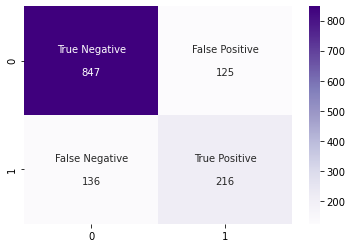

In [34]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

## Data Export

In [35]:
pickle.dump(scaler,open('scaler.pickle', 'wb'))

In [36]:
pickle.dump(clr, open('clr.pickle', 'wb'))

## Predicting on New Data

In [37]:
scaler = pickle.load(open('scaler.pickle', 'rb'))
clr=pickle.load(open('clr.pickle','rb'))

In [38]:
df_new=pd.read_excel('New_Data.xlsx')
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3319-DWOEP,Male,1,Yes,No,6,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.75,573.75
1,1074-WVEVG,Female,0,Yes,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.35,1267
2,9979-RGMZT,Female,0,No,No,7,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,94.05,633.45
3,6437-UDQJM,Female,1,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),84.10,6129.65
4,1226-IENZN,Male,1,No,No,16,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.75,1218.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
413,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
414,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
415,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6


In [39]:
df_new.drop(labels=df_new[df_new['tenure'] == 0].index, axis=0, inplace=True)
df_new[df_new['tenure'] == 0].index

Int64Index([], dtype='int64')

In [40]:
df_new[["tenure", 'MonthlyCharges', 'TotalCharges']]=scaler.fit_transform(df_new[["tenure", 'MonthlyCharges', 'TotalCharges']])
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3319-DWOEP,Male,1,Yes,No,-0.561798,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.505817,-0.281046
1,1074-WVEVG,Female,0,Yes,No,0.629213,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,-1.019727,-0.072922
2,9979-RGMZT,Female,0,No,No,-0.539326,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,0.471421,-0.263123
3,6437-UDQJM,Female,1,Yes,No,0.921348,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),0.270106,1.386917
4,1226-IENZN,Male,1,No,No,-0.337079,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0.161861,-0.087558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,6840-RESVB,Male,0,Yes,Yes,-0.157303,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.284269,0.144283
413,2234-XADUH,Female,0,Yes,Yes,0.921348,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0.656550,1.757156
414,4801-JZAZL,Female,0,Yes,Yes,-0.449438,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,-0.832575,-0.349285
415,8361-LTMKD,Male,1,Yes,No,-0.606742,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.073849,-0.361248


In [41]:
df_new = df_new.apply(lambda x: object_to_int(x))
df_new.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,149,1,1,1,0,-0.561798,1,0,1,0,0,2,0,2,2,0,1,2,0.505817,-0.281046
1,46,0,0,1,0,0.629213,1,0,2,1,1,1,1,1,1,1,0,3,-1.019727,-0.072922
2,414,0,0,0,0,-0.539326,1,0,1,0,2,0,0,2,2,1,1,3,0.471421,-0.263123
3,267,0,1,1,0,0.921348,1,2,0,2,2,2,0,2,2,2,1,1,0.270106,1.386917
4,53,1,1,0,0,-0.337079,1,0,1,0,0,0,0,0,2,0,1,2,0.161861,-0.087558
5,97,1,0,1,0,-0.134831,1,2,0,0,0,2,0,0,0,0,0,1,-0.307537,-0.031402
6,380,0,0,1,0,0.067416,1,2,0,2,2,0,2,0,0,0,0,2,-0.163885,0.229664
7,185,0,0,0,0,-0.674157,1,2,1,0,0,0,0,0,0,0,1,2,0.075873,-0.430928
8,67,0,0,1,1,-0.471910,1,2,1,0,2,2,0,2,2,0,1,1,0.634294,-0.132410
9,231,1,0,1,0,-0.157303,1,0,2,1,1,1,1,1,1,1,0,3,-1.024785,-0.293010


In [42]:
X_test_new=df_new.drop(columns=('customerID'))
X_test_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,1,1,0,-0.561798,1,0,1,0,0,2,0,2,2,0,1,2,0.505817,-0.281046
1,0,0,1,0,0.629213,1,0,2,1,1,1,1,1,1,1,0,3,-1.019727,-0.072922
2,0,0,0,0,-0.539326,1,0,1,0,2,0,0,2,2,1,1,3,0.471421,-0.263123
3,0,1,1,0,0.921348,1,2,0,2,2,2,0,2,2,2,1,1,0.270106,1.386917
4,1,1,0,0,-0.337079,1,0,1,0,0,0,0,0,2,0,1,2,0.161861,-0.087558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1,0,1,1,-0.157303,1,2,0,2,0,2,2,2,2,1,1,3,0.284269,0.144283
413,0,0,1,1,0.921348,1,2,1,0,2,2,0,2,2,1,1,1,0.656550,1.757156
414,0,0,1,1,-0.449438,0,1,0,2,0,0,0,0,0,0,1,2,-0.832575,-0.349285
415,1,1,1,0,-0.606742,1,2,1,0,0,0,0,0,0,0,1,3,0.073849,-0.361248


In [43]:
df_new['New_Churn']=clr.predict(X_test_new)
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,New_Churn
0,149,1,1,1,0,-0.561798,1,0,1,0,...,2,0,2,2,0,1,2,0.505817,-0.281046,1
1,46,0,0,1,0,0.629213,1,0,2,1,...,1,1,1,1,1,0,3,-1.019727,-0.072922,0
2,414,0,0,0,0,-0.539326,1,0,1,0,...,0,0,2,2,1,1,3,0.471421,-0.263123,1
3,267,0,1,1,0,0.921348,1,2,0,2,...,2,0,2,2,2,1,1,0.270106,1.386917,0
4,53,1,1,0,0,-0.337079,1,0,1,0,...,0,0,0,2,0,1,2,0.161861,-0.087558,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,285,1,0,1,1,-0.157303,1,2,0,2,...,2,2,2,2,1,1,3,0.284269,0.144283,0
413,104,0,0,1,1,0.921348,1,2,1,0,...,2,0,2,2,1,1,1,0.656550,1.757156,0
414,202,0,0,1,1,-0.449438,0,1,0,2,...,0,0,0,0,0,1,2,-0.832575,-0.349285,0
415,349,1,1,1,0,-0.606742,1,2,1,0,...,0,0,0,0,0,1,3,0.073849,-0.361248,1


In [44]:
df_new[df_new['New_Churn']==1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,New_Churn
0,149,1,1,1,0,-0.561798,1,0,1,0,...,2,0,2,2,0,1,2,0.505817,-0.281046,1
2,414,0,0,0,0,-0.539326,1,0,1,0,...,0,0,2,2,1,1,3,0.471421,-0.263123,1
4,53,1,1,0,0,-0.337079,1,0,1,0,...,0,0,0,2,0,1,2,0.161861,-0.087558,1
7,185,0,0,0,0,-0.674157,1,2,1,0,...,0,0,0,0,0,1,2,0.075873,-0.430928,1
8,67,0,0,1,1,-0.471910,1,2,1,0,...,2,0,2,2,0,1,1,0.634294,-0.132410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,133,0,0,0,0,-0.292135,1,2,1,0,...,2,2,0,2,0,1,0,0.491654,0.050886,1
403,105,0,1,0,0,-0.561798,0,1,0,0,...,0,0,2,2,0,1,2,-0.533131,-0.374323,1
406,287,1,1,0,0,-0.674157,1,2,1,0,...,0,0,0,0,0,1,2,0.101163,-0.430553,1
409,353,1,0,0,0,-0.269663,1,0,1,0,...,0,0,2,0,0,1,0,0.160850,-0.004443,1
